# Churn Prediction - Data Science Case Study

In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTEN

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

#data = pd.read.csv('')
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## Introduction
### Problem
This case study is supposed to demonstrate basic data science techniques and their potential to guide business decisions when applied to real world problems.
The dataset contains information concerning customers of a portugese telecomunication company.
The central problem, this case study aims to solve, is to determine causes of churn. The feature 'churn' in the dataset shows wich customers canceled their contracts during the last month. The urgency with witch companies try to find and eliminate causes of churn is explained by the fact, that the aquisition of new customers is 5-25 times more expensive (depending on study and industry) than the costs of keeping current customers (Gallo, 2014, S.1).

### Goals
The main goal of this case study is to work out features correlating with churn. An EDA is supposed to allow the drawing of first conclusions pertaining the dataset. On the basis of those first results three mlms are going to be trained using different methods of data preprocessing. The reasoning behind the choice of preprocessing methods is to be explained according to the findings of the EDA.


## EDA
### Data Shape & Quality


import data.

In [86]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.drop(['customerID'], axis= 1, inplace = True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cardinality:

In [87]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Missing values.

In [88]:
print('is empty:\n', data.eq('').sum() + data.eq(' ').sum())
print('is null:\n', data.isnull().sum())
print('is zero:\n', data.eq(0).sum())

is empty:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
is null:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
is zero:
 gender                 0
SeniorCitizen     

In [89]:
zeroIndexCharges = data[data['TotalCharges'] == ' '].index

zeroIndexTenure = data[data['tenure'] == 0].index

print('indexes of emtpy Charges rows:\n' + str(zeroIndexCharges) + '\nindexes of empty tenure rows:\n' + str(zeroIndexTenure))


indexes of emtpy Charges rows:
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
indexes of empty tenure rows:
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


Check data types.

In [90]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Summary:
- 7043 entries.
- Features: 3 numeric, 19 nominal.
- Feature 'CustomerID' does not contain valuable information and is to be dropped in data prep.
- 'SeniorCitizen' is the only nominal feature that's dummy encoded.
- Values of 'TotalCharges' are saved as Obj types, instead of as floats.
- low cardinality among all features (max. cardinality = 4).
- features can be seperated into different categories: demographic, account Information, subsribed services of contract.
- 22 duplicate rows.
- 11 entries with missing values in 'TotalCharges' and 'Tenure'. The indices of both feature's missing entries were compared and found to be in the same data entries.

### Statistics
Value distribution of numeric features (excluding dummy encoded 'SeniorCitizen'):

In [91]:
data['TotalCharges']=data['TotalCharges'].replace(" ", 0)
data['TotalCharges']= pd.to_numeric(data['TotalCharges'])

Outlier detection:
First define function.

In [92]:
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df >(q3+1.5*IQR)))]
    return outliers



Then search in every numeric column.

In [93]:
print("Outliers in 'tenure' = " + str(len(find_outliers_IQR(data['tenure']))))
print("Outliers in 'MonthlyCharges' = " + str(len(find_outliers_IQR(data['MonthlyCharges']))))
print("Outliers in 'TotalCharges' = " + str(len(find_outliers_IQR(data['TotalCharges']))))

Outliers in 'tenure' = 0
Outliers in 'MonthlyCharges' = 0
Outliers in 'TotalCharges' = 0


No outliers detected.

A histogramm gives insight into the value distribution of numeric features

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

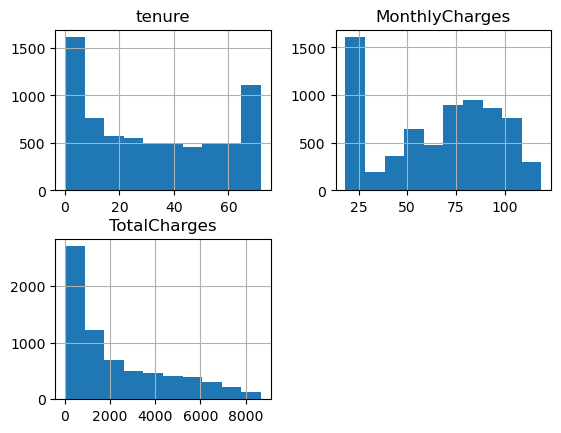

In [94]:
data.drop("SeniorCitizen", axis=1).hist()

'TotalCharges' appears to show costs over the whole contract period. A high correlation with 'tenure' and 'TotalCharges' is to be expected, and examined further.

There is a strong data imbalance in the 'churn' feature:

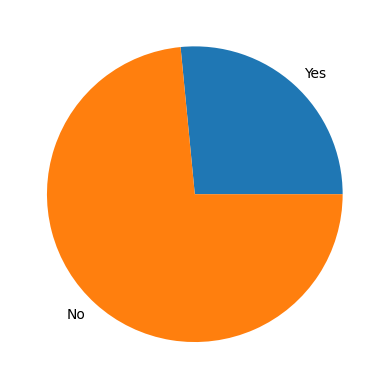

In [95]:
fig, ax = plt.subplots()
ax.pie([data['Churn'].eq("Yes").sum(), data['Churn'].eq("No").sum()], labels = ["Yes", "No"])


plt.show()

The 'No'-class of 'Churn' is found about three times more often than the 'Yes'-class. For the training of mlms this imbalance obviously translates to the models training focusing about three times as much on predicting the 'No'-class. As the goal of this case study is to train models that are supposed to help prevent churn, they ought to focus more heavily on the correct detection of churn, than is's absence. Methods for handling these kinds of situations, along with a discussion about suitable evaluation metrics will follow later.

First the dataset is to be examined more thoroughly. To this end the data is split into the three categories found earlier: Demographic information, account information and customer account information. To visualize possible correlation with customer churn, the classes of each of the features are to be divided into entries with positive and negative churn values.


In [96]:
predictionVariable = pd.DataFrame(data.Churn)
services = pd.DataFrame(data[['DeviceProtection', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']])
accountInfo = pd.DataFrame(data[['tenure', 'Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']])
custDemographic = pd.DataFrame(data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']])

In [97]:
def createPlotGrid(data, corrVarStr, sizeWidth, sizeHeight, fRows, fCols):
    plotRow = 0
    plotCol = 0
    
    f = plt.figure(figsize=(sizeWidth, sizeHeight))
    gs = f.add_gridspec(fRows,fCols)

    for n, col in enumerate(data.columns):

        ax = f.add_subplot(gs[plotRow, plotCol])
        sns.countplot(data = data, x = col, hue = corrVarStr)


        if plotCol < (fCols - 1):
           plotCol += 1
        else:
            plotCol = 0
            plotRow += 1

    f.tight_layout()


#### Demographic information

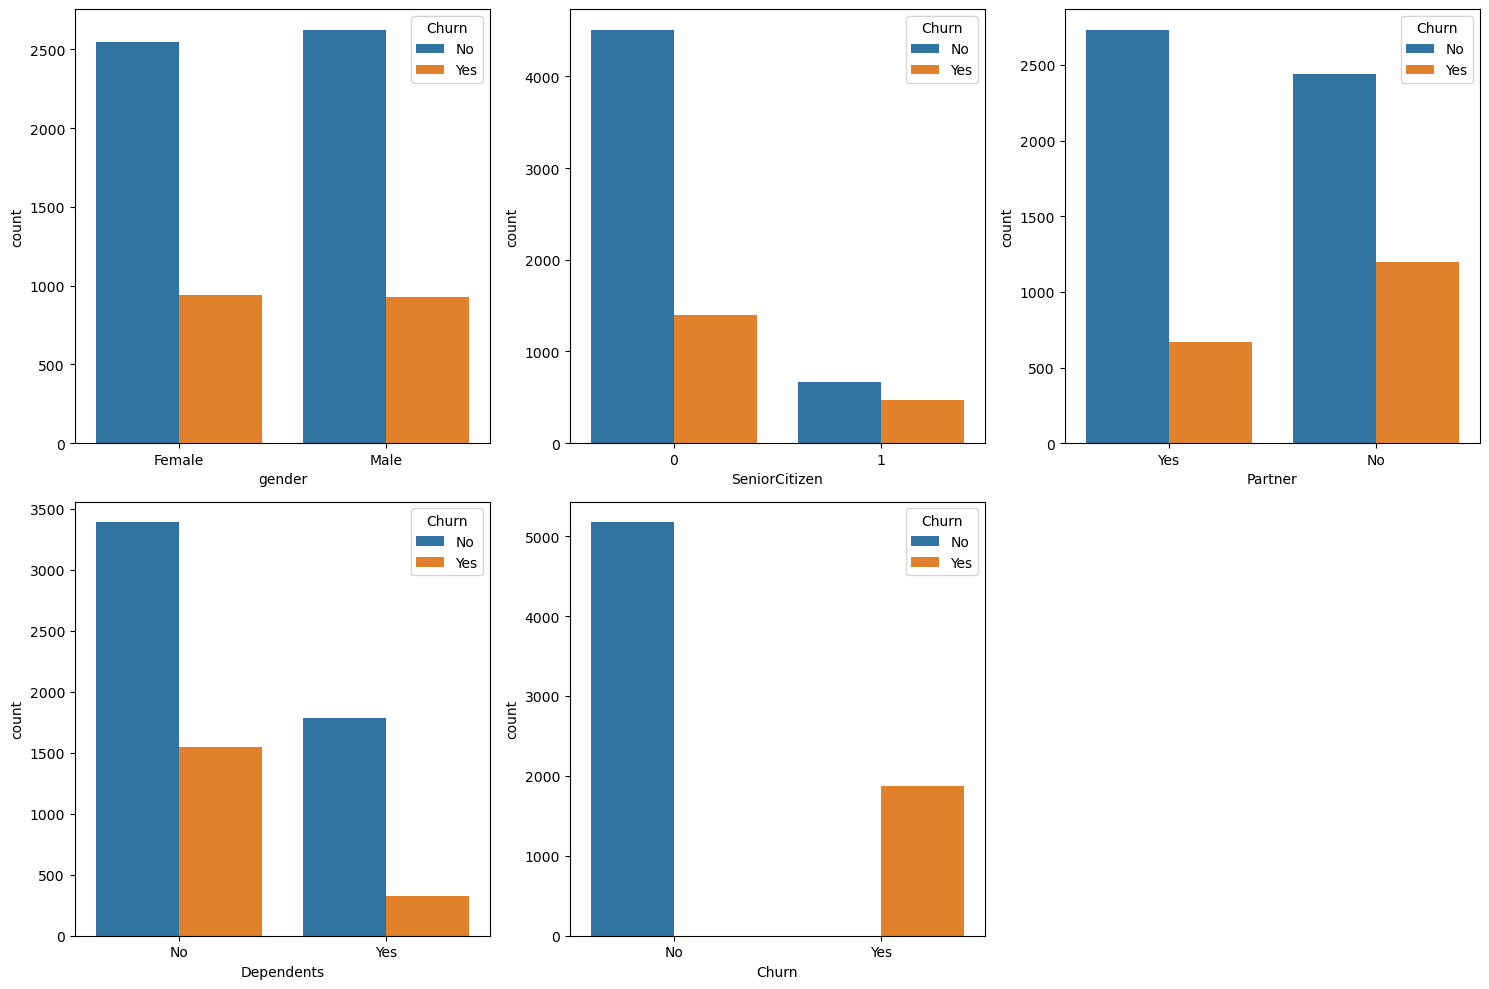

In [98]:
createPlotGrid(custDemographic, "Churn", 15, 10, 2, 3)

- Gender is irrelevant for churn.
- Senior citizens make up small customer segment with high churn percentage.
- Singles make up about half of the customer base and churn twice as much as customers in relationships.
- Customers with dependents churn less frequently.

#### Account Information

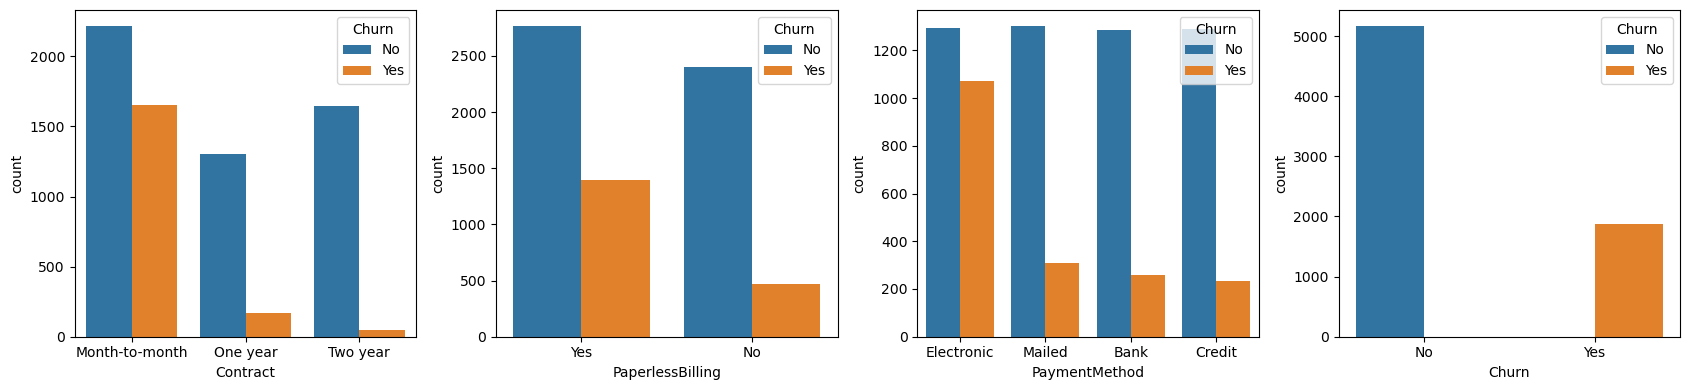

In [99]:
accountFigData = accountInfo.drop(['tenure','MonthlyCharges', 'TotalCharges'], axis = 1)

accountFigData = accountFigData.replace({'PaymentMethod' : {'Electronic check': 'Electronic', 'Mailed check' :'Mailed', 'Bank transfer (automatic)' :'Bank', 'Credit card (automatic)': 'Credit'}})


createPlotGrid(accountFigData, "Churn", 17, 4, 1, 4)

- for the purpose of readability the "PaymentMethod" feature's class names have been abbreviated. 
- Chrun correlates negatively with length of contract. From the three available features the chrunrate's growth seems to be exponential.
- Highest churnrate in the classes of the feature 'Contract' is found in the customer segment containing the greatest amount of customers: 'Month-to-month'. Positive churn values can be found in almost half of the entries of the class. Sadly, the given data does not contain information about this being a singular, or monthly recurring occurence/trend. For the interpretation and the formulation of strategic action, according to data analysis, this information would be urgently needes. For the sake of this case study it is assumed, that this is not an irregular occurence.
- Customers that chose paperless billing are three times less likely to churn. The assumption that a greater part of those customers are made up of busineses that need those bills for their tax returns could be further examined with more data.

#### Services

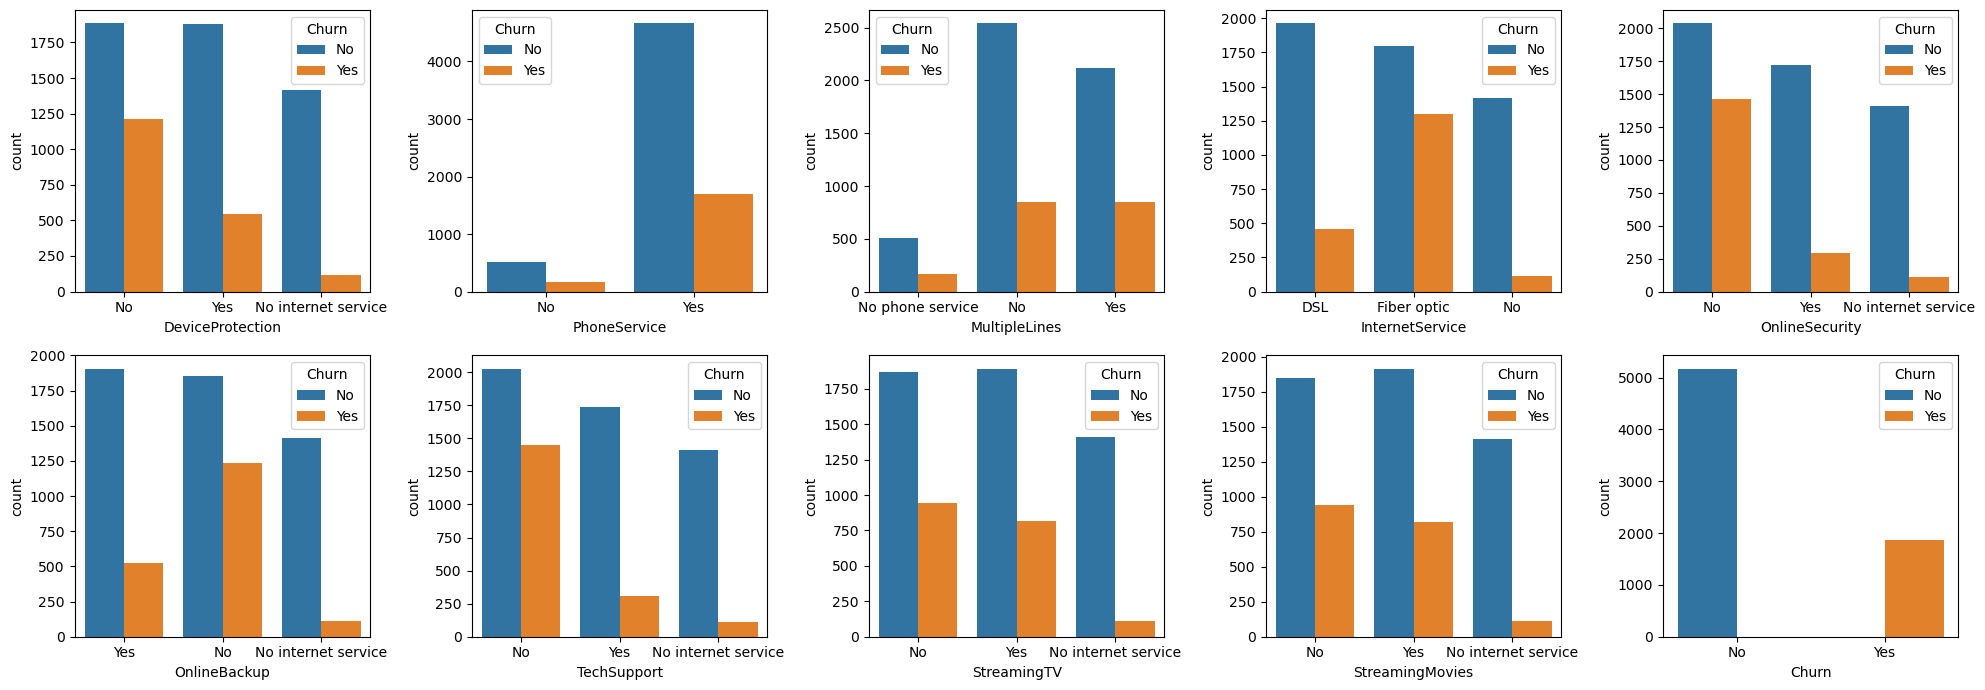

In [100]:

createPlotGrid(services, "Churn", 20, 7, 2, 5)

This segment seems to allow further insight into the correlation of features to churn and the dataset in general:
- The churn correlation of many features exhibit a strong skewedness away from classes containing the customers who booked additional services for their contracts. It is to be expected that those features will be chosen by algorithms for feature selection in later stages of the case study.
- The biggest differences in the distribution of churning customers are found in the features "DeviceProtection", "InternetService", "OnlineSecurity", "OnlineBackup", and "TechSupport", while the features "MultipleLines", "StreamingTV" and "StreamingMovies" show comparatively little differnce among their respective classes.
- An outlier to the described observations is found in the feature "InternetService". Where other features show less churn in more expensive contract options, via the booking of additional services, the most expensive class of "InternetService", "Fiber optic" exhibits a chrunrate close to 50%, more than double the chrunrate of the less performant but cheaper "DSL" class. This points to dissatisfaction of customers with the cost-benefit-ration of fibre optics internet connections provided by the company in the month this dataset represents. Sadly this interpretation cannot be made with much confidece with the data on hand, as more information would be needed to verify this claim. Useful informations could be comprised of, but not limited to, customer feedback, customer satisfaction data and statistics about technical parameters like the average internet speed and connection downtime in the previous and current months.

the last step of this EDA will focus on further examining the correlation tendencies that have become apparent from the visualizations in this section. 

### Correlation, collinearity and multicolinearity

#### Background / Motivation
Especially in the context of prediction models based on regression techniques that will be applied to the dataset in this case study the kinds of associations between features are of importance for the functioning of those models. Some neccacary terms for understanding these relationships are:
- Correlation: A linear relationship between two features. With growing values in some feature A values in some feature B also grow/diminsih by some coefficient X (A = XB).
- Collinearity: Problem occuring in the application of regression models in datasets where two or more features are strongly linearly correlated. As regresison models weigh the impact of a number of independent variables on some dependent variable (churn, in this case) by assigning coefficients to each independent variable signifying the impact of their values on the value of the dependent variable, it would not be possible for these models to assign distinct coeefficients to two collinear features.
- Multicollinearity: An extreme case of collinearity in a dataset. Describes cases where at least three features show collinearity. 

On this basis this section of the EDA aims to answer three questions:
1. How strongly do whole features correlate with churn?
2. What impact do individual classes of nominal features have on their correlation?
3. How do features correlate with each other? Is there (multi-)collinearity in the dataset?


In order to use the intended methods for examining collinearity in the dataset the data will need to be prepared in certain ways.
To enable label encoding, the missing values of the features "tenure" and "TotalCharges" will be imputed to the mean of their respective features.

In [101]:
data['tenure'] = np.where(data['tenure'] == 0, np.nan, data['tenure'] )
data['tenure'] = data['tenure'].fillna(data['tenure'].mean())

data['TotalCharges'] = np.where(data['TotalCharges'] == 0, np.nan, data['TotalCharges'] )
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

print(data.isna().sum())



gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


To calculate the correlation of all features among themselves, the imputed dataset is label encoded and numeric features are scaled.

In [102]:
le = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))


scaledEncodedData = data.apply(le.fit_transform)

scaledEncodedData[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(scaledEncodedData[['tenure', 'MonthlyCharges', 'TotalCharges']])


scaledEncodedData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.089646,0.011332,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.314394,0.554977,0
2,1,0,0,0,0.013889,1,0,0,2,2,0,0,0,0,0,1,3,0.275253,0.082083,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.167929,0.546708,0
4,0,0,0,0,0.013889,1,0,1,0,0,0,0,0,0,0,1,2,0.460227,0.103216,1


#### Heatmap
From this data a heatmap can be used to visualize the relationships:

C:\Users\Dominik\AppData\Local\Temp\ipykernel_20880\2015378808.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


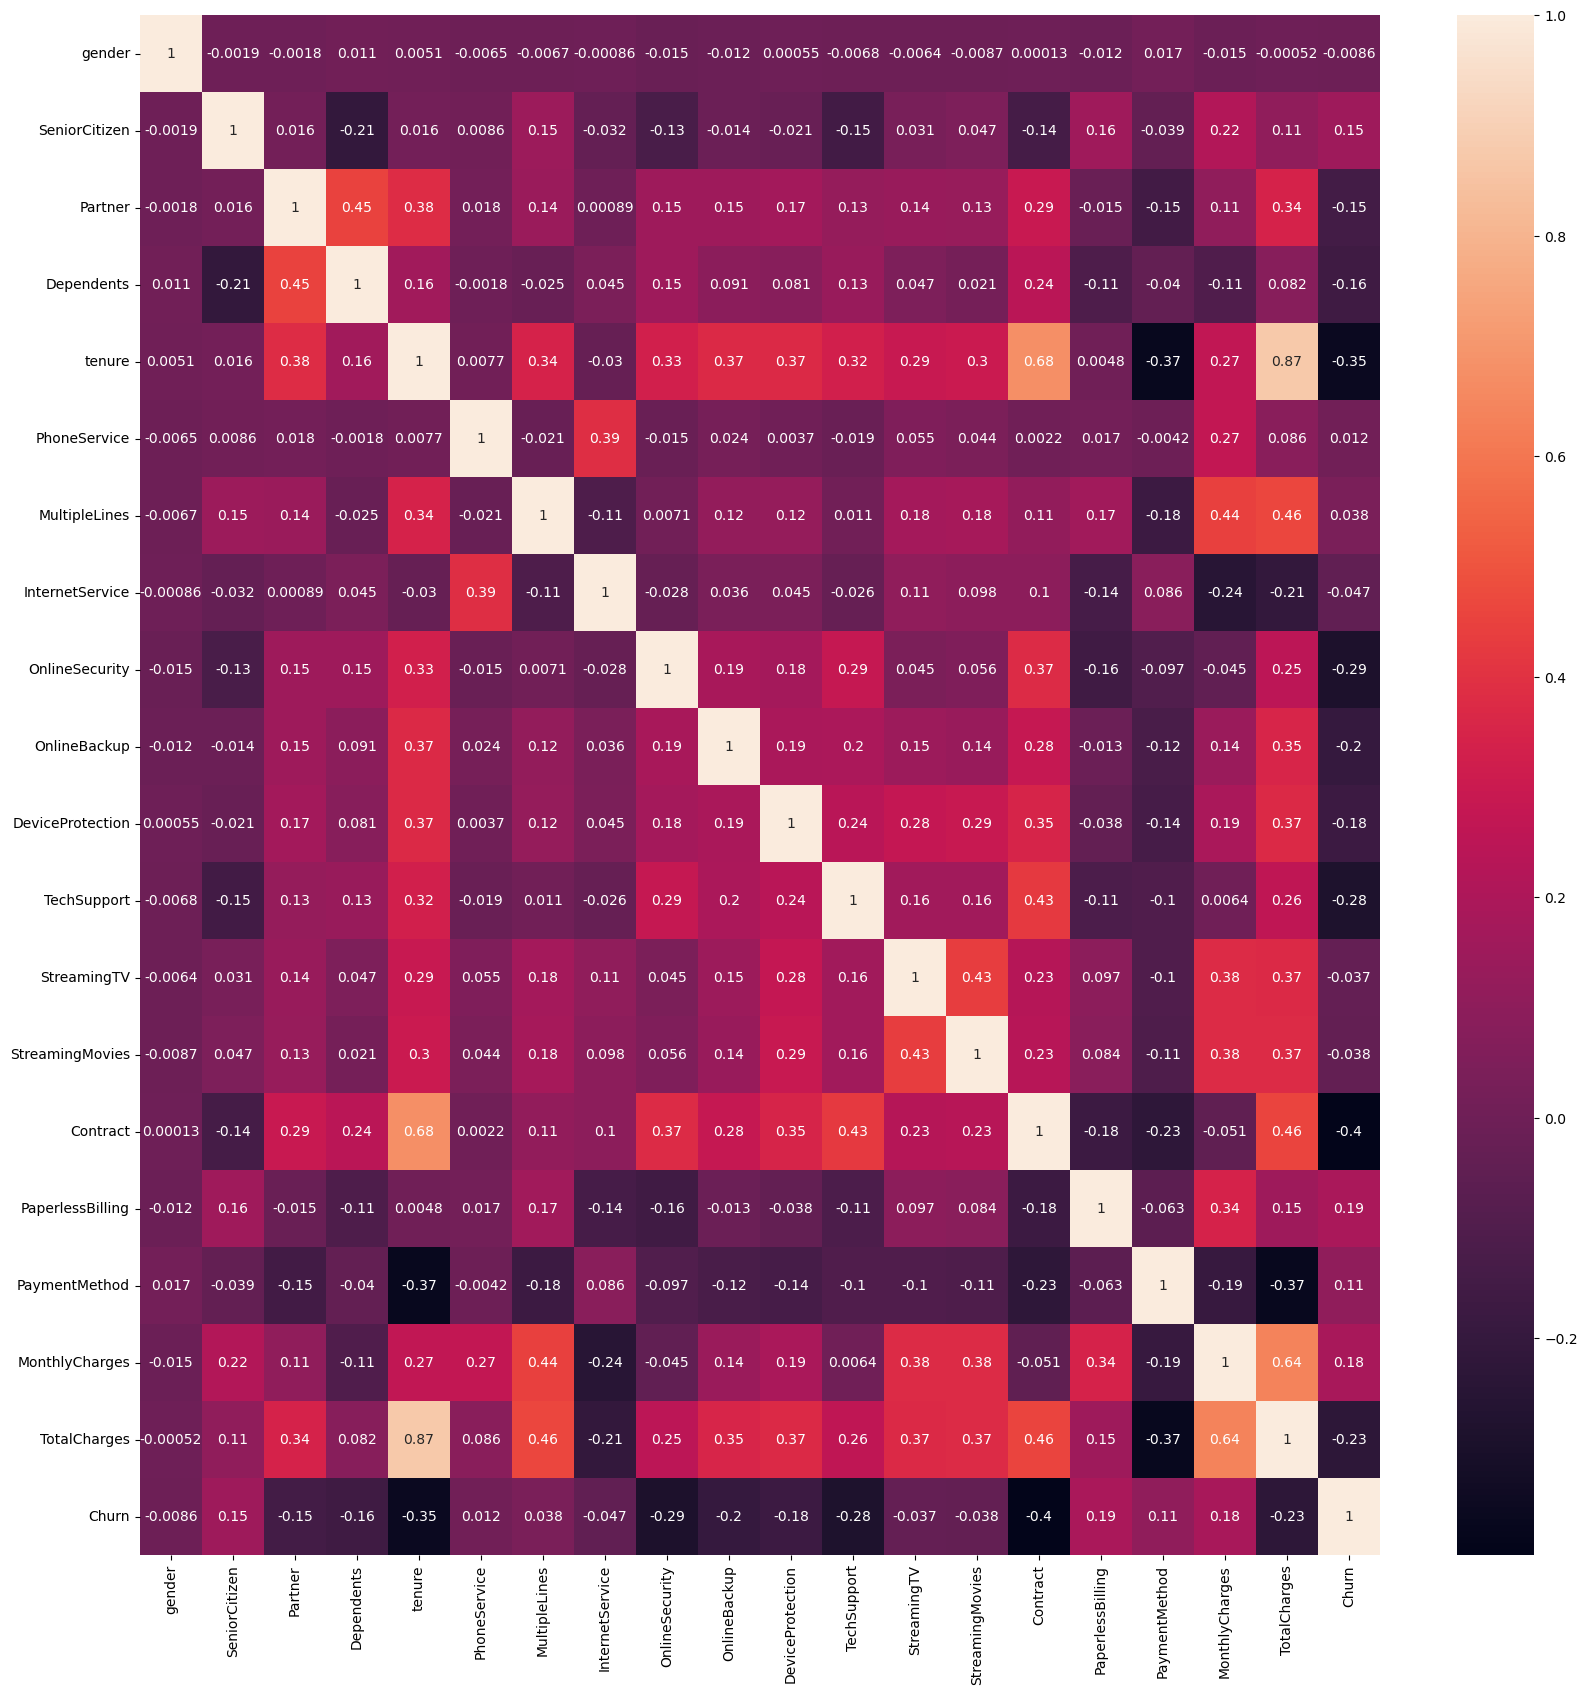

In [103]:

corr_matrix = scaledEncodedData.corr()
f = plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot= True)

f.show()

This heatmap gives a good answer to question 1. of this section.
Some oservations that come to mind:
- The strongest correlation can be found for 'tenure' and 'TotalCharges' with 0.87.
- The relatively high correlation of the features 'partner' and 'Dependents' makes sense, as customers with partners are more likely to raise children than customers who are single, thus contributing to the correlation of those features.
- Interpretation of nominal feature's correaltion coefficients proves to be difficult in most cases, as the coefficient summarizes the impact of all data classes of a feature.
- Another problem with the heatmap's interpretation encoding method of the dataset. As the nominal features had to be label encoded, an odrinality was artificially added into the features. Furthermore the given ordinality was not manually controlled, to minimize its impact on the calculation of coefficients. For example, for all service-features that contain the class 'No internet service' this class should have been assigned to the number zero, the class 'No' to the number one, and the class 'Yes' to the number two.

The heatmap does give a general overview of the features relationships to one another, but does not do a good job of answering any more of the stated questions.

#### Class Correlation with Churn - Calculation of Coefficients
The heatmap gives a comparatively good overview of the correlation of all classes of all features to one another, but doesn't give insight towards the correlation of the individual classes of the nominal features. Therefore another way to approach the examination of correlations in a dataset is to use the .corr function that computes correation coefficients for two columns.
In combination with a dummy encoding the correlation coefficient of each class of all features with the dependent variable 'Churn' can be visualized.

<Axes: >

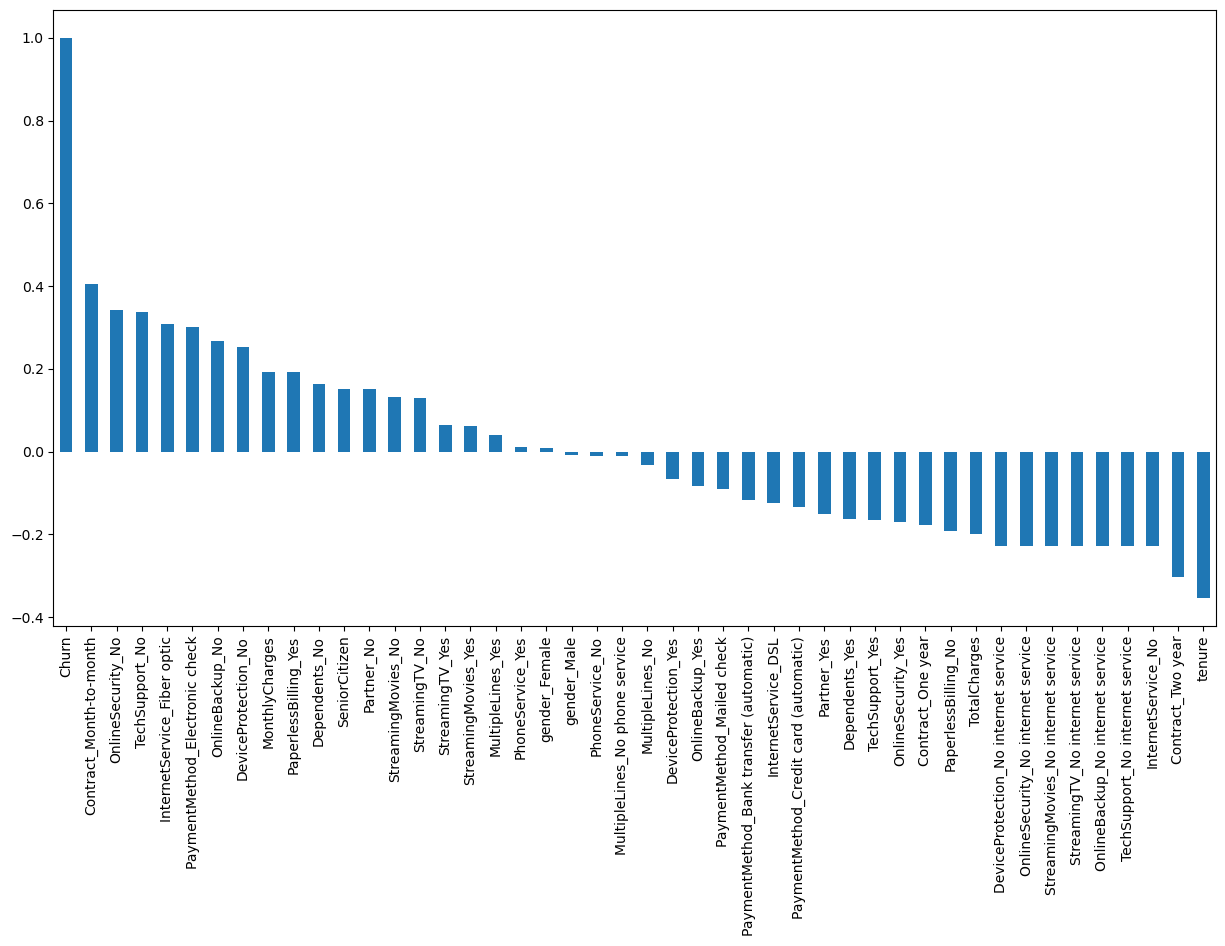

In [106]:
dummyData = pd.get_dummies(data.drop(['Churn'], axis=1))
dummyData = pd.concat([dummyData, data.loc[:, ['Churn']]], axis = 1)
data['Churn'] = np.where((data.Churn == 'No'), 0, data.Churn)
data['Churn'] = np.where((data.Churn == 'Yes'), 1, data.Churn)
dummyData['Churn'] = dummyData['Churn'].astype('uint8')

plt.figure(figsize=(15,8))
dummyData.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Important features concerning correlation with churn can be found on the ends of the depicted spectrum.<br>Classes with high, positive coefficients like month-to-month contracts, contracts without online security and tech support services and fibre optics internet connections, tend to cause churn. High,negative Coefficients mark Classes that prevent churn.<br>
This perspectove on the data allows for more detailed conclusions than the heatmap regarding the correlation of features with churn, as nominal features with a cardinality > 2 are split into a corresponding amount of features, instead of having the correlation of each of their classes summarized into one value.<br> A Good example would be the feature 'InternetService'. The Heatmap shows it's coefficient with churn to be -0.047, while the dummy encoding reveals the high impact of it's individual classes on churn, with two of its classes in the top four classes causing and preventing churn.

The last step in this EDA will be to examine the multicoliniarity in the dataset.

#### Multicolliniarity among features
To calculate multicollineatity among features the variance inflation factor (VIF) can be used.<br>
To calculete the VIF each feature is regressed against each other feature of a dataset. The calculated VIF's then show the inflation of coefficients due to multicollinearity. <br>

The VIF's values can be interpreted like this:
- VIF = 1: No significant correlation to other features in the dataset.
- VIF = 1 to 5: moderate correlation to other features.
- VIF > 5: significant correlation. Feature not fit for use of regression models.


In [107]:
#design matrix for regression with 'Churn' as response variable
y, X = dmatrices("Churn ~ {}".format(" + ".join(scaledEncodedData.columns)), data = scaledEncodedData, return_type='dataframe')
vif_df = pd.DataFrame()
vif_df ['variable'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            variable        VIF
0          Intercept  23.514950
1             gender   1.001762
2      SeniorCitizen   1.152358
3            Partner   1.462738
4         Dependents   1.382928
5             tenure  14.108687
6       PhoneService   1.605859
7      MultipleLines   1.410889
8    InternetService   1.784602
9     OnlineSecurity   1.264172
10      OnlineBackup   1.197960
11  DeviceProtection   1.292046
12       TechSupport   1.320684
13       StreamingTV   1.462806
14   StreamingMovies   1.460627
15          Contract   2.618559
16  PaperlessBilling   1.206024
17     PaymentMethod   1.179367
18    MonthlyCharges   5.903366
19      TotalCharges  19.305111
20             Churn   1.426418


The features 'tenure', ' MonthlyCharges' and 'TotalCharges' are multicollinear. To resolve the multicollinearity the feature with the highest VIF will be dropped successively until no vif > 5 remains in the dataset.

In [108]:
#design matrix for regression with 'Churn' as response variable
y, X = dmatrices("Churn ~ {}".format(" + ".join(scaledEncodedData.drop(['TotalCharges'], axis=1).columns)), data = scaledEncodedData.drop(['TotalCharges'], axis=1), return_type='dataframe')
vif_df = pd.DataFrame()
vif_df ['variable'] = X.columns

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            variable        VIF
0          Intercept  23.144541
1             gender   1.001716
2      SeniorCitizen   1.152043
3            Partner   1.461095
4         Dependents   1.382326
5             tenure   2.880130
6       PhoneService   1.605580
7      MultipleLines   1.404652
8    InternetService   1.649812
9     OnlineSecurity   1.259419
10      OnlineBackup   1.194875
11  DeviceProtection   1.286249
12       TechSupport   1.315479
13       StreamingTV   1.462580
14   StreamingMovies   1.460159
15          Contract   2.486932
16  PaperlessBilling   1.205859
17     PaymentMethod   1.179364
18    MonthlyCharges   2.775122
19             Churn   1.367080


Already after dropping the highest VIF feature 'TotalCharges' no VIF > 2.8 remained in the dataset. This is deemed aceptable for a primary feature selection for later use in regression models.

In [109]:
logRegData = scaledEncodedData.drop(['TotalCharges'], axis=1)

## MLMs
This sections main goal is not to produce the best models possible with the most efficient tools available, but to to assemble three basic models (logistic regression, decision tree and random forest) and investigate how these models' performance can be impacted by differnent methods for data preprocessing and choice of hyperparameters. A focus will be put on the reasoning behind the choices made here, and verification of the observed results. For a more efficient, results-focused approach, the use of libraries like the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">sklearn pipeline</a> would be better suited.

### Performance evaluation criteria
As the training of supervised mlms often is an incremental, heuristic process in wich different approaches for feature engineering, data sampling, hyperparametertuning, etc. are successively tested, it is advisable to define the performance criteria to be used in the model optimization and the rating of the quality of one's results. To achive this the metrics for measuring a model's performance have to be chosen in alignment with the respective context and goals.<br>
Regarding the scenario at hand, a selection of evaluation criteria becomes evident by deriving them from the initial conditions and goals of this case study:
- As initially stated, the economic damage caused by churn is greater by multidues than the costs of keeping existing customers.
- Not predicting a certain number of customers at risk of churning will therefore be worse than falsely predicting an equal number of customers to churn.
- For the training and rating of model perfomance this translates to a focus on minimizing false negatives, that is, churning customers that models predict will not churn. The corresponding metric is <b>recall</b> (tp/tp+fn).
- A sole focus on maximizing a model's recall will not suffice though, as, for a model to achieve a recall of 100%, all it has to do, is to predict churn for every single customer in the dataset. To rectify this, the model performace will additionaly be measures by their <b>f1-score</b> and <b>ROC AUC</b>, as these metrics are better indicators for general model performance. After balancing the data with oversampling techniques <b>cohen's kappa</b> can also be used.<br>


Before writing a function for calculating the metrics, a table for collecting reslts for all models is created.

In [110]:
d = ['Model', 'Recall', 'F1 score', 'ROC AUC', "Cohen's kappa"]
resultsTable = pd.DataFrame(columns = d)

def addResultsRow(newRow):
    global resultsTable
    resultsTable = pd.concat([resultsTable, newRow.to_frame().T], ignore_index=True)
    
resultsTable


,Model,Recall,F1 score,ROC AUC,Cohen's kappa


The metrics will be calculated by a custom function that adds a new row to the results table in addition to creating graphs of the ROC AUC of each model.

In [111]:
def modelMetrics(y_valid, preds, modelName):
    #recall
    recall = round(recall_score(y_valid, preds),3)
    #f1 score
    f1 = round(f1_score(y_valid, preds), 3)
    #cohen kappa
    kappa  = round(cohen_kappa_score(y_valid, preds), 3)
    #roc
    f = plt.figure().clf()
    fpr, tpr, _ = roc_curve(y_valid, preds)
    auc = round(roc_auc_score(y_valid, preds), 4)
    plt.plot(fpr, tpr, label= modelName + ' AUC= '+ str(auc))
    plt.legend()

    #add row to results table
    new_row = pd.Series({'Model': modelName,'Recall': recall,'F1 score': f1, 'ROC AUC': auc, "Cohen's kappa": kappa})
    addResultsRow(new_row)

#### Data Preprocessing
Simillarly to data transformations done in the EDA, this step's purpose is to transform the dataset in order to be compatible with mlms. For example the scikit-learn decision tree and random forest models don't have internal methods for handling non-numeric data, so some encoding method has to be chosen for nominal variables.<br> But not only basic compatibility with models must be ensured. The following section of the case study is going to test different methods of data preparation and their effects on the models' results.
##### Data Leakage
Something to be concious of is the fact, that some methods of data preprocessing can corrupt the training data. An example would be the imputation used earlier in the EDA, when missing values of the features 'tenure' and 'TotalCharges' were imputed to the mean value of their respective columns. If this data would be used in the training data, the resulting models would contain some level of information about the test data, that is, the mean of the imputed columns. To prevent the possibility of data leakage, a new dataframe containing the raw data will be split into train and testset, after data cleaning. All data preprocessing will be done separately of train an test data from then on.

In [112]:
#loading raw dataset
finalData = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
finalData.drop(['customerID'], axis= 1, inplace = True)

#repeat data cleaning from EDA
#encode chrun
finalData['Churn'] = np.where((finalData.Churn == 'No'), 0, finalData.Churn)
finalData['Churn'] = np.where((finalData.Churn == 'Yes'), 1, finalData.Churn)
finalData['Churn'] = finalData['Churn'].astype('uint8')
#change type of 'TotalCharges'
finalData['TotalCharges']=finalData['TotalCharges'].replace(" ", 0)
finalData['TotalCharges']= pd.to_numeric(finalData['TotalCharges'])

#partitioning
X = finalData.drop(['Churn'], axis=1)
y = finalData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= 0.3, stratify=finalData.Churn)

#Imputation of 11 missin value rows to mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform([X_train['tenure']])
imp.fit_transform([X_test['tenure']])
imp.fit_transform([X_train['TotalCharges']])
imp.fit_transform([X_test['TotalCharges']])

#Encoding & Scaling - Use pipeline to encode categoric and scale numeric features







array([[1740.7 ,  201.7 , 1842.8 , ..., 2021.2 ,  528.45, 6148.45]])

Stratified sampling was used in partitioning to preserve the data imbalance found in the dataset in train and test data.<br>
Now the pipeline can be tested with models using minimal data preparation. <br>
To this end two encodings for nominal features will be tested:
- OneHot Encoding (=Dummy Enconding): Features will be split into as many binary features as there are classes. The "drop_first=True" option ensures avoiding an extra layer of multicollinearity caused by this encoding, as for data instances containing '0' for all dummy features of an original feature, except one, the last dummy feature neccecarily has to be '1'. Due to this it is common practise to drop one dummy feature.
- Label Encoding: An integer will be assigned to every class of a feature.

In [113]:
le = LabelEncoder()

#label encoded datasets
X_trainLabelEnc = X_train.apply(le.fit_transform)
X_testLabelEnc = X_test.apply(le.fit_transform)

#onehot encoded datasets
X_trainOneHotEnc = pd.get_dummies(X_train, drop_first=True)
X_testOneHotEnc = pd.get_dummies(X_test, drop_first=True)

### Baseline Models

Many prerequisites for the logistic regression algorithms are not met with this setup. As discovered in the EDA, there is multicollinearity in the dataset and the numeric data has not been scaled. Therefor poor performance is to be expected.<br>
The performance difference between the two encodings will determine the encodings used in further testing iterations.

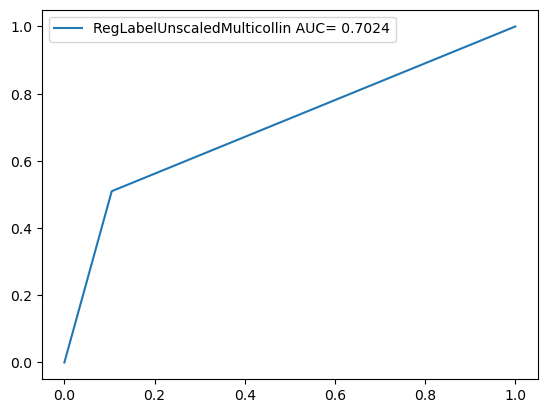

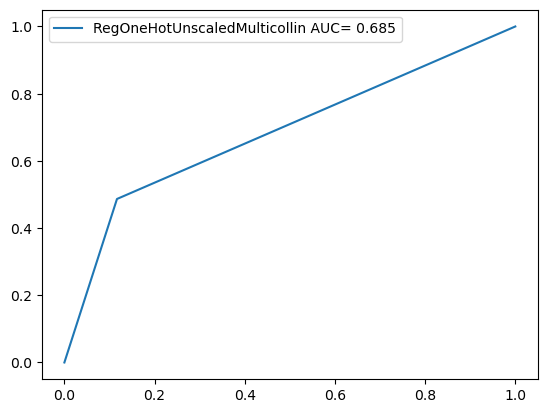

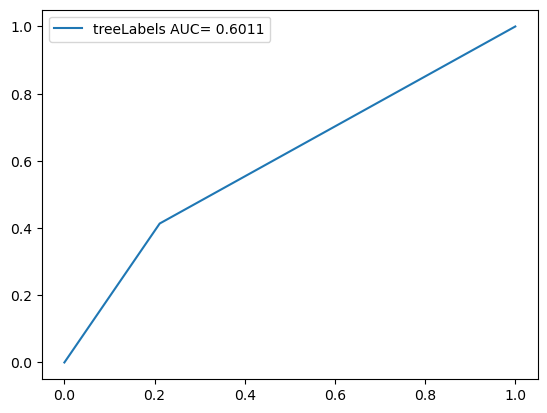

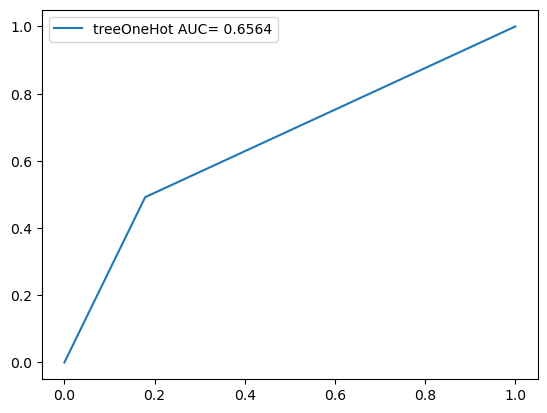

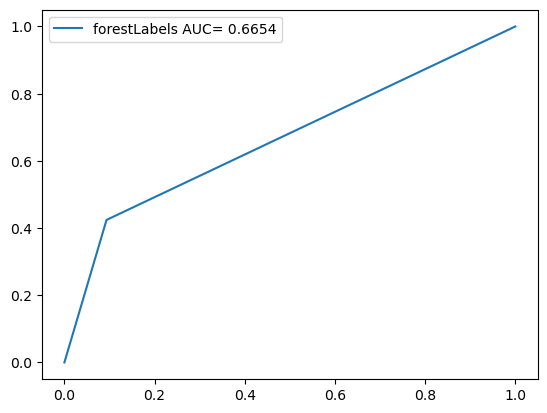

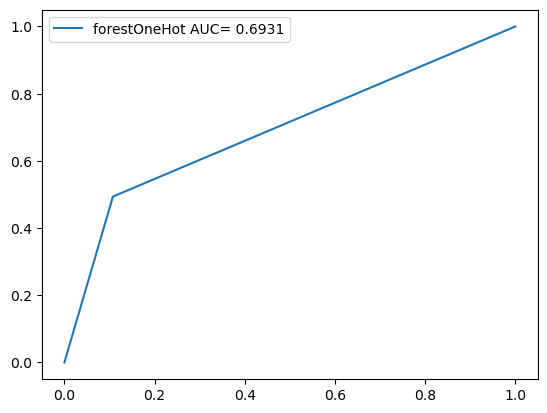

In [114]:
#creating models
logRegLabelEnc = LogisticRegression(random_state=42, max_iter=10000, solver='sag')
logRegOneHotEnc = LogisticRegression(random_state=42, max_iter=10000, solver='sag')

treeLabelEnc = DecisionTreeClassifier(random_state=42)
treeOneHotEnc = DecisionTreeClassifier(random_state=42)

forestLabelEnc = RandomForestClassifier(random_state=42)
forestOneHotEnc = RandomForestClassifier(random_state=42)

#fitting
logRegLabelEnc.fit(X_trainLabelEnc, y_train)
logRegLabelPreds = logRegLabelEnc.predict(X_testLabelEnc)
modelMetrics(y_test, logRegLabelPreds, "RegLabelUnscaledMulticollin")

logRegOneHotEnc.fit(X_trainOneHotEnc, y_train)
logRegOneHotPreds = logRegOneHotEnc.predict(X_testOneHotEnc)
modelMetrics(y_test, logRegOneHotPreds, "RegOneHotUnscaledMulticollin")

treeLabelEnc.fit(X_trainLabelEnc, y_train)
treeLabelEncPreds = treeLabelEnc.predict(X_testLabelEnc)
modelMetrics(y_test, treeLabelEncPreds, "treeLabels")

treeOneHotEnc.fit(X_trainOneHotEnc, y_train)
treeOneHotEncPreds = treeOneHotEnc.predict(X_testOneHotEnc)
modelMetrics(y_test, treeOneHotEncPreds, "treeOneHot")

forestLabelEnc.fit(X_trainLabelEnc, y_train)
forestLabelEncPreds = forestLabelEnc.predict(X_testLabelEnc)
modelMetrics(y_test, forestLabelEncPreds, "forestLabels")

forestOneHotEnc.fit(X_trainOneHotEnc, y_train)
forestOneHotEncPreds = forestOneHotEnc.predict(X_testOneHotEnc)
modelMetrics(y_test, forestOneHotEncPreds, "forestOneHot")

In [115]:
resultsTable

,Model,Recall,F1 score,ROC AUC,Cohen's kappa
0,RegLabelUnscaledMulticollin,0.51,0.566,0.7024,0.432
1,RegOneHotUnscaledMulticollin,0.487,0.538,0.685,0.394
2,treeLabels,0.414,0.414,0.6011,0.202
3,treeOneHot,0.492,0.495,0.6564,0.314
4,forestLabels,0.424,0.504,0.6654,0.368
5,forestOneHot,0.494,0.551,0.6931,0.414


It seems the default hyperparameters of the decision tree models perform even worse on this dataset than the logistic regression without data normalization and multicollinearity in the dataset. The next iteration only tests the logistic regression for scaled data without multicollinearity as decision tree based models are immune to both those issues.

### Logistic Regression without multicollinearity and scaled data
In accordance to the VIF results of the EDA, 'TotalCharges' will be dropped. The feature range of the scaler is (0,1).

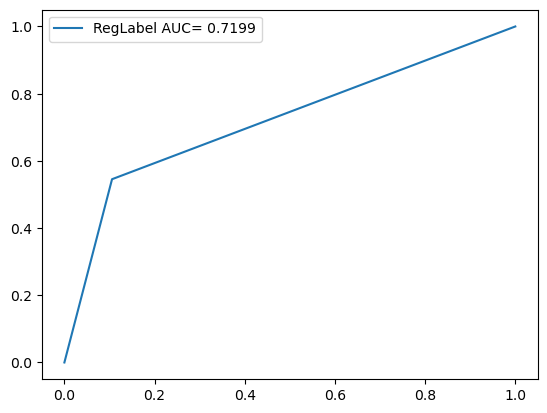

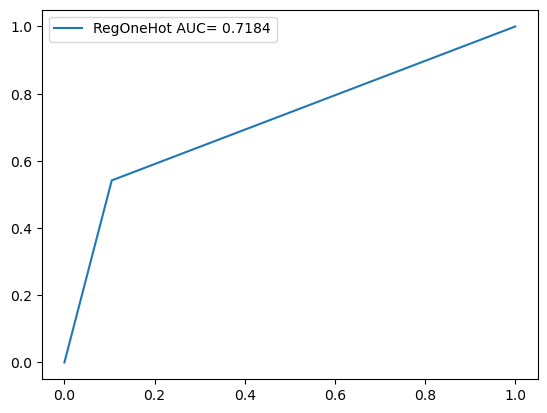

In [116]:
#dropping 'TotalCharges for multicollinearity
X_trainLabelEncReg = X_trainLabelEnc.drop('TotalCharges', axis=1)
X_testLabelEncReg = X_testLabelEnc.drop('TotalCharges', axis=1)

X_trainOneHotEncReg = X_trainOneHotEnc.drop('TotalCharges', axis=1)
X_testOneHotEncReg = X_testOneHotEnc.drop('TotalCharges', axis=1)


#scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_trainLabelEncReg[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLabelEncReg[['tenure', 'MonthlyCharges']])
X_testLabelEncReg[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_testLabelEncReg[['tenure', 'MonthlyCharges']])

X_trainOneHotEncReg[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainOneHotEncReg[['tenure', 'MonthlyCharges']])
X_testOneHotEncReg[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_testOneHotEncReg[['tenure', 'MonthlyCharges']])

#creating models
logRegLabelEnc1 = LogisticRegression(random_state=42, max_iter=10000, solver='sag')
logRegOneHotEnc1 = LogisticRegression(random_state=42, max_iter=10000, solver='sag')

#fitting
logRegLabelEnc1.fit(X_trainLabelEncReg, y_train)
logRegLabelPreds1 = logRegLabelEnc1.predict(X_testLabelEncReg)
modelMetrics(y_test, logRegLabelPreds1, "RegLabel")

logRegOneHotEnc1.fit(X_trainOneHotEncReg, y_train)
logRegOneHotPreds1 = logRegOneHotEnc1.predict(X_testOneHotEncReg)
modelMetrics(y_test, logRegOneHotPreds1, "RegOneHot")

In [117]:
resultsTable

,Model,Recall,F1 score,ROC AUC,Cohen's kappa
0,RegLabelUnscaledMulticollin,0.51,0.566,0.7024,0.432
1,RegOneHotUnscaledMulticollin,0.487,0.538,0.685,0.394
2,treeLabels,0.414,0.414,0.6011,0.202
3,treeOneHot,0.492,0.495,0.6564,0.314
4,forestLabels,0.424,0.504,0.6654,0.368
5,forestOneHot,0.494,0.551,0.6931,0.414
6,RegLabel,0.545,0.594,0.7199,0.464
7,RegOneHot,0.542,0.591,0.7184,0.462


These baseline values already show the effects of different encoding methods for this dataset. As the cardinality of nominal features is quite low, one disadvantage of OneHot encoding, the large amount of features it can produce, is mitigated somewhat, while the disadvantage of label encoding, the creation of artificial ordinality of features, can remain detrimental to model performance.<br>
As a result, the OneHot encoded dataset will be chosen as the default for testing further methods of improving the model performance.<br>
Based on the results of the EDA, a further method for data preprocessing would be to balance the dependant variable 'Churn'.

#### Data Balancing
To balance the distribution of a dependant variable in classification methods, in order to prevent a model's training to overly focus on detecting some majority class, different methods are available, some of wich are:
- Undersampling: Dropping instances of the majority class. To be avoided due to the great loss of training data.
- Oversampling: Add instances of the minority class(-es). The simplest way to achieve oversampling is to copy instances of the minority class. this in turn can lead to overfitting a model on the copied data.
- SMOTE (Synthetic Minority Oversampling Technique): To alleviate the problem of overfitting on oversampled data instances, the SMOTE algorithm aims to generate fictional, but plausible data instances based on the following steps:
    1. Calculation of the k-nearest neigbours of each data instance of the minority class, using the Euclidian distance.
    2. Depending on how many samples have to be generated to balance the data (sampling rate), a number of the k-next neighbours of the data instance are randomly chosen.
    3. The distance of all vectors describing the feature values of the randomly chosen neigbours and the initial sample are multiplied by a Factor between 0 and 1, generating a sysnthetic data instance.
This algorithm ensures random noise in the oversampled data instances to prevent overfitting all while loosing a minimal amount of plausibility of the generated data. In consequence usage of SMOTE is often a compromise, trading higher recall for a lower accuracy. This aligns with the goals of this case study, wich is why SMOTE will be chosen for data balancing.<br>


As many sources can be found, stating that SMOTE yields better results when used after feature selection (<a href="https://riubu.ubu.es/bitstream/handle/10259/6192/Ramos-esa_2022.pdf;jsessionid=A093E910EF9CE65CE91B4ADB5C43C742?sequence=1">example 1</a>,<a href="https://stackoverflow.com/questions/63375860/sampling-before-or-after-feature-selection">example 2</a>,<a href="https://stats.stackexchange.com/questions/321970/imbalanced-data-smote-and-feature-selection">example 3</a>).


### Recursive Feature Eliminiation
For feature selection, an algorithm testing model performance while recursively dropping the least important features of the dataset was tested. Cross validation is used here to verify results without accessing the test data to prevent data leakage.

Optimal number of features for LogisticRegression(max_iter=10000, random_state=42, solver='sag'): 15


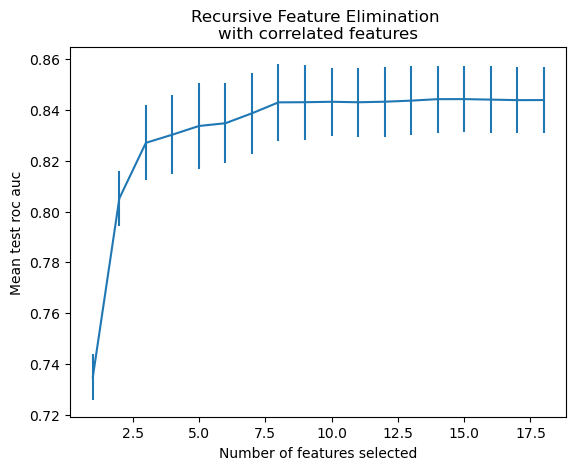

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges'],
      dtype='object')
Optimal number of features for DecisionTreeClassifier(random_state=42): 4


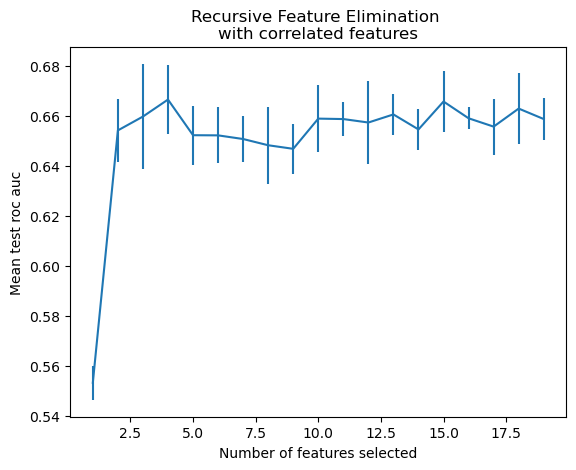

Index(['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Optimal number of features for RandomForestClassifier(random_state=42): 17


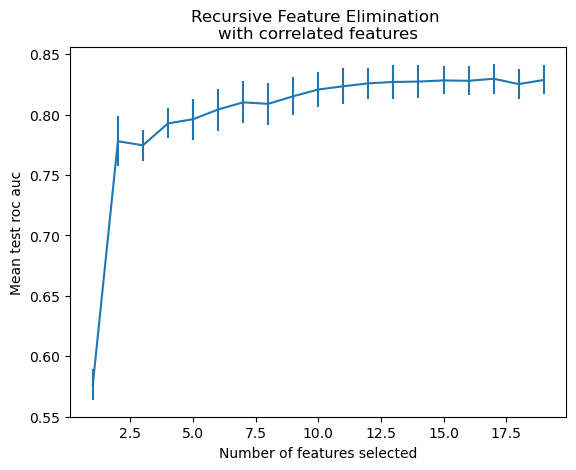

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [118]:

le = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))

#X_train = pd.get_dummies(X_train, drop_first = True)
X_trainLeScaled = X_train.apply(le.fit_transform)
X_trainLeScaled[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_trainLeScaled[['tenure', 'MonthlyCharges', 'TotalCharges']])

#instatiating all models for feature selection
logReg2 = LogisticRegression(random_state=42, max_iter=10000, solver="sag")
tree2 = DecisionTreeClassifier(random_state=42)
forest2 = RandomForestClassifier(random_state=42)

clfs = [logReg2, tree2, forest2]

#optimal features for each model NOT ONEHOT
min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)


for clf in clfs:
    X_used = X_trainLeScaled.drop('TotalCharges', axis=1) if clf == logReg2 else X_trainLeScaled

    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="roc_auc",
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_used, y_train)

    print(f"Optimal number of features for {str(clf)}: {rfecv.n_features_}")

    #plotting number of features against cross-val scores
    n_scores = len(rfecv.cv_results_["mean_test_score"])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test roc auc")
    plt.errorbar(
        range(min_features_to_select, n_scores + min_features_to_select),
        rfecv.cv_results_["mean_test_score"],
        yerr=rfecv.cv_results_["std_test_score"],
    )
    plt.title("Recursive Feature Elimination \nwith correlated features")
    plt.show()

    mask = rfecv.get_support()
    features = X_used.columns
    best_features = features[mask]
    print(best_features)



The random forest and regression models ROC AUC seems to grow proportionally to the amount of features used. The relatively great fluctuations in performance in the decision tree model are suprising in that way as well as the result of only four features for ideal performance.

In [126]:
X_trainLogRegFeatures = X_train[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]
X_testLogRegFeatures = X_test[['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']]

X_trainTreeFeatures = X_train[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]
X_testTreeFeatures = X_test[['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']]

X_trainForestFeatures = X_train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
X_testForestFeatures = X_test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

#logReg dummies
X_trainLogReg2 = pd.get_dummies(X_trainLogRegFeatures, drop_first=True)
X_testLogReg2 = pd.get_dummies(X_testLogRegFeatures, drop_first=True)

#logReg scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_trainLogReg2[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogReg2[['tenure', 'MonthlyCharges']])
X_testLogReg2[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_testLogReg2[['tenure', 'MonthlyCharges']])

#trees dummies
X_trainTree2 = pd.get_dummies(X_trainTreeFeatures)
X_testTree2 = pd.get_dummies(X_testTreeFeatures)
#forest dummies
X_trainForest2 = pd.get_dummies(X_trainForestFeatures)
X_testForest2 = pd.get_dummies(X_testForestFeatures)


Testing feature Selection.

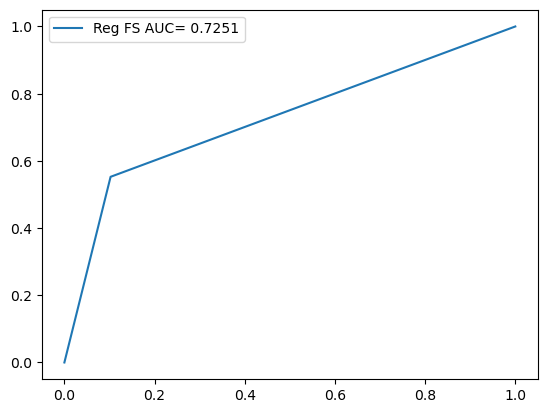

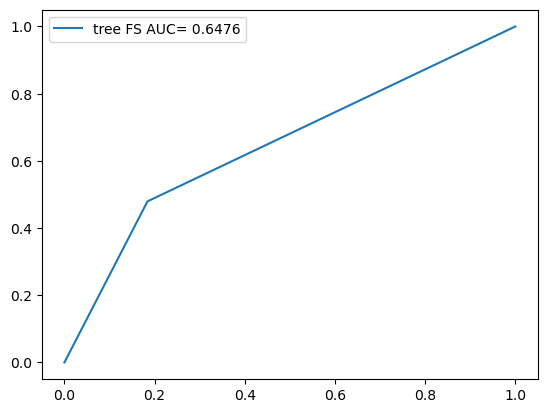

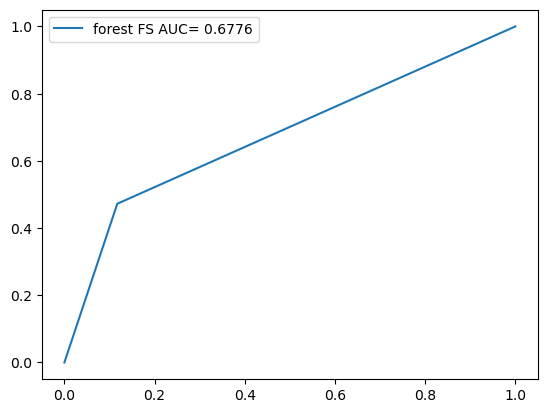

In [127]:
#instatiating all models for feature selection
logReg2 = LogisticRegression(random_state=42, max_iter=10000, solver="sag")
tree2 = DecisionTreeClassifier(random_state=42)
forest2 = RandomForestClassifier(random_state=42)

logReg2.fit(X_trainLogReg2, y_train)
logReg2preds = logReg2.predict(X_testLogReg2)
modelMetrics(y_test, logReg2preds, "Reg FS")

tree2.fit(X_trainTree2, y_train)
tree2preds = tree2.predict(X_testTree2)
modelMetrics(y_test, tree2preds, "tree FS")

forest2.fit(X_trainForest2, y_train)
forest1preds = forest2.predict(X_testForest2)
modelMetrics(y_test, forest1preds, "forest FS")

In [128]:
resultsTable

,Model,Recall,F1 score,ROC AUC,Cohen's kappa
0,RegLabelUnscaledMulticollin,0.51,0.566,0.7024,0.432
1,RegOneHotUnscaledMulticollin,0.487,0.538,0.685,0.394
2,treeLabels,0.414,0.414,0.6011,0.202
3,treeOneHot,0.492,0.495,0.6564,0.314
4,forestLabels,0.424,0.504,0.6654,0.368
5,forestOneHot,0.494,0.551,0.6931,0.414
6,RegLabel,0.545,0.594,0.7199,0.464
7,RegOneHot,0.542,0.591,0.7184,0.462
8,Reg FS,0.553,0.602,0.7251,0.475
9,tree FS,0.442,0.452,0.6283,0.26


The results show improvements of the logistic regression's performance. The decision tree models don't improve with the features, the algorithm came up with. One possible explanation for this is, that the feature selection algorithm had to work with a lable encoded dataset, thus differing from the encoding method used in the models here. Spending more effort into researching and implementing feature selection algorithms more applicable to this scenario seems hardly viable, as especcialy the random forest uses methods to weigh feature importance internally (feature bagging).

## Oversampling with SMOTE
As explained earlier, SMOTE will be used for oversampling the minority class of the 'Churn' feature. The algorithm used is SMOTENC (-Nominal and Continuous) that allows for datasets containing a mix of nominal and numeric features, as the oversampling will be implemented before encoding the data.


In [138]:
#for unencoded models
X_trainResampled, y_trainResampled = SMOTENC(random_state=42, categorical_features=[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16]).fit_resample(X_train, y_train)

X_trainRegResampled, y_trainRegResampled = SMOTENC(random_state=42, categorical_features=[0,1,3,4,5,6,7,8,9,10,11,12,13]).fit_resample(X_trainLogRegFeatures, y_train)


#logReg encoding
X_trainLogReg3 = pd.get_dummies(X_trainRegResampled, drop_first=True)
#X_trainLogReg3 = X_trainLogRegResampled.apply(le.fit_transform)

#logReg scaling
scaler = MinMaxScaler(feature_range=(0,1))
X_trainLogReg3[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_trainLogReg3[['tenure', 'MonthlyCharges']])

#trees dummies
X_trainTree3 = pd.get_dummies(X_trainResampled, drop_first=True)
#forest dummies
X_trainForest3 = pd.get_dummies(X_trainResampled, drop_first=True)

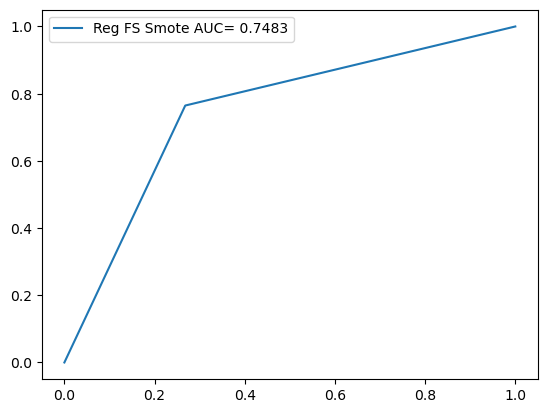

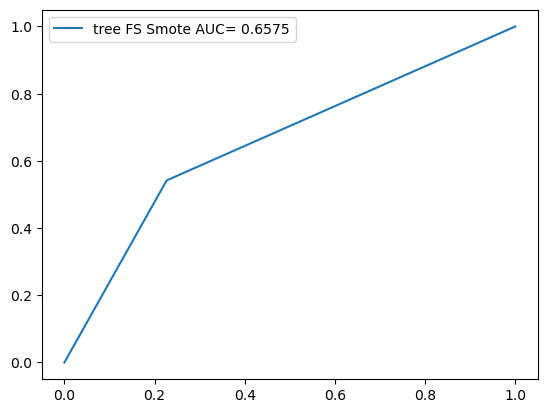

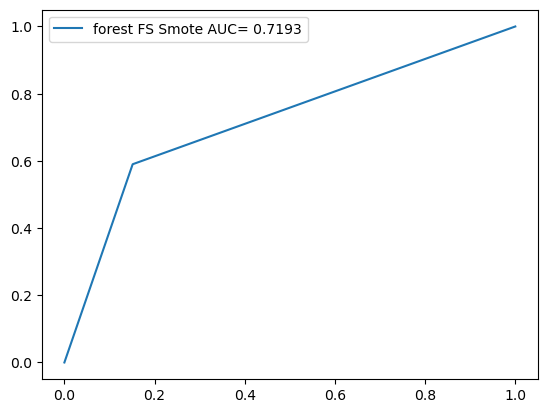

In [140]:
logReg3 = LogisticRegression(random_state=42, max_iter=10000)
tree3 = DecisionTreeClassifier(random_state=42)
forest3 = RandomForestClassifier(random_state=42)


logReg3.fit(X_trainLogReg3, y_trainRegResampled)
logReg3preds = logReg3.predict(X_testLogReg2)
modelMetrics(y_test, logReg3preds, "Reg FS Smote")

tree3.fit(X_trainTree3, y_trainResampled)
tree3preds = tree3.predict(X_testOneHotEnc)
modelMetrics(y_test, tree3preds, "tree FS Smote")

forest3.fit(X_trainForest3, y_trainResampled)
forest3preds = forest3.predict(X_testOneHotEnc)
modelMetrics(y_test, forest3preds, "forest FS Smote")

In [141]:
resultsTable

,Model,Recall,F1 score,ROC AUC,Cohen's kappa
0,RegLabelUnscaledMulticollin,0.51,0.566,0.7024,0.432
1,RegOneHotUnscaledMulticollin,0.487,0.538,0.685,0.394
2,treeLabels,0.414,0.414,0.6011,0.202
3,treeOneHot,0.492,0.495,0.6564,0.314
4,forestLabels,0.424,0.504,0.6654,0.368
5,forestOneHot,0.494,0.551,0.6931,0.414
6,RegLabel,0.545,0.594,0.7199,0.464
7,RegOneHot,0.542,0.591,0.7184,0.462
8,Reg FS,0.553,0.602,0.7251,0.475
9,tree FS,0.442,0.452,0.6283,0.26


All models shows the expected rise in recall. In case of the logistic regression the trade off for general model performance (due to accuracy loss) can be observed (very slight), whereas the decision tree and random forest also improve their overall pervormance.

### Hyperparameter tuning

c:\Users\Dominik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dominik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dominik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Dominik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueE

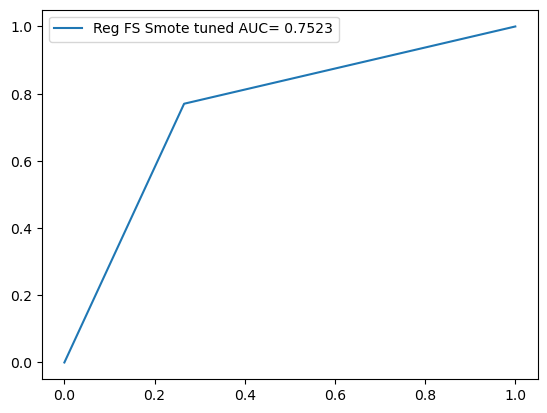

In [146]:
# Create param grid.
scores = ["precision", "recall", "roc_auc"]

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','sag', 'newton-cholesky']},
]

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring="roc_auc", n_jobs=-1)


# Fit on data
logReg4 = clf.fit(X_trainLogReg3, y_trainLogRegResampled)
logReg4preds = logReg4.predict(X_testLogReg2)
modelMetrics(y_test, logReg4preds, "Reg FS Smote tuned")


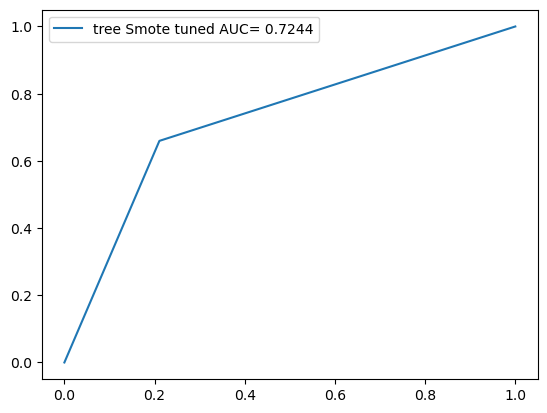

In [149]:
# Create param grid.
param_grid = [
    {'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12],
    },
]
# Create grid search object
clf = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = 5, scoring="roc_auc", n_jobs=-1)
# Fit on data
tree4 = clf.fit(X_trainTree3, y_trainResampled)
tree4preds = tree4.predict(X_testOneHotEnc)
modelMetrics(y_test, tree4preds, "tree Smote tuned")





In [150]:
resultsTable

,Model,Recall,F1 score,ROC AUC,Cohen's kappa
0,RegLabelUnscaledMulticollin,0.51,0.566,0.7024,0.432
1,RegOneHotUnscaledMulticollin,0.487,0.538,0.685,0.394
2,treeLabels,0.414,0.414,0.6011,0.202
3,treeOneHot,0.492,0.495,0.6564,0.314
4,forestLabels,0.424,0.504,0.6654,0.368
5,forestOneHot,0.494,0.551,0.6931,0.414
6,RegLabel,0.545,0.594,0.7199,0.464
7,RegOneHot,0.542,0.591,0.7184,0.462
8,Reg FS,0.553,0.602,0.7251,0.475
9,tree FS,0.442,0.452,0.6283,0.26


In [ ]:
print(tree4.best_estimator_.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Beste Parameter sind 'Criterion' : gini mit maximaler Tiefe der Branches von 6

In [ ]:
print(forest4.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


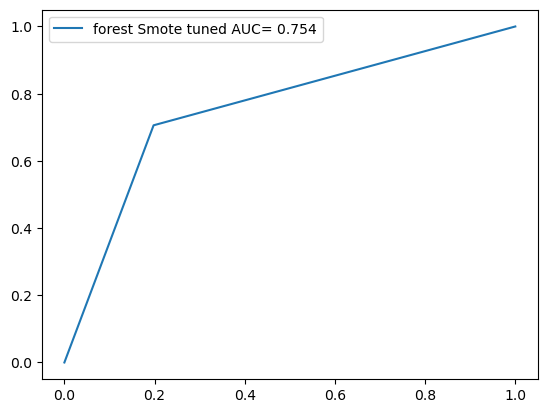

In [152]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [12, 15, 20,25],
    'min_samples_leaf': [50, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'max_features': [5, 10, 20, 30]
    }

clf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=random_grid, scoring="accuracy", n_iter=100, cv=5, random_state=42, n_jobs=-1)

forest4 = clf.fit(X_trainForest3, y_trainResampled)
forest4preds = forest4.predict(X_testOneHotEnc)
modelMetrics(y_test, forest4preds, "forest Smote tuned")




In [153]:
resultsTable

,Model,Recall,F1 score,ROC AUC,Cohen's kappa
0,RegLabelUnscaledMulticollin,0.51,0.566,0.7024,0.432
1,RegOneHotUnscaledMulticollin,0.487,0.538,0.685,0.394
2,treeLabels,0.414,0.414,0.6011,0.202
3,treeOneHot,0.492,0.495,0.6564,0.314
4,forestLabels,0.424,0.504,0.6654,0.368
5,forestOneHot,0.494,0.551,0.6931,0.414
6,RegLabel,0.545,0.594,0.7199,0.464
7,RegOneHot,0.542,0.591,0.7184,0.462
8,Reg FS,0.553,0.602,0.7251,0.475
9,tree FS,0.442,0.452,0.6283,0.26


In [154]:
print(forest4.best_estimator_.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 50, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## Feature Importance

Text(0, 0.5, 'Mean decrease in impurity')

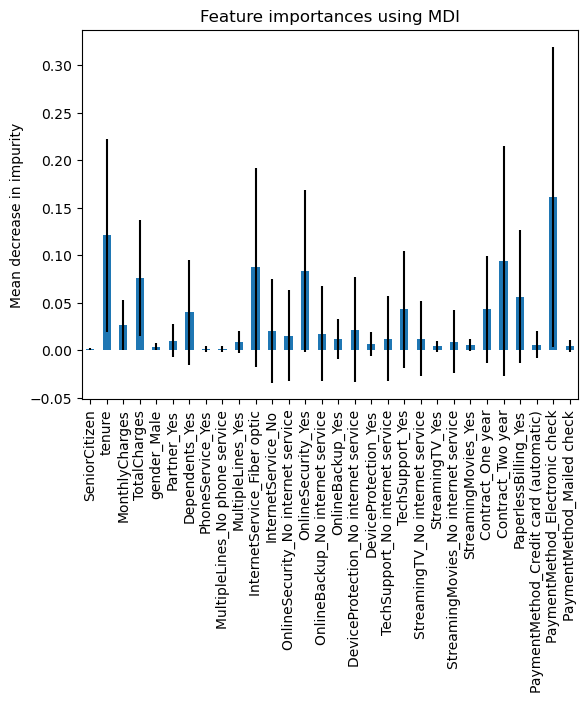

In [155]:
feature_names = X_trainForest3.columns

importances = forest4.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest4.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

Text(0, 0.5, 'Mean decrease in impurity')

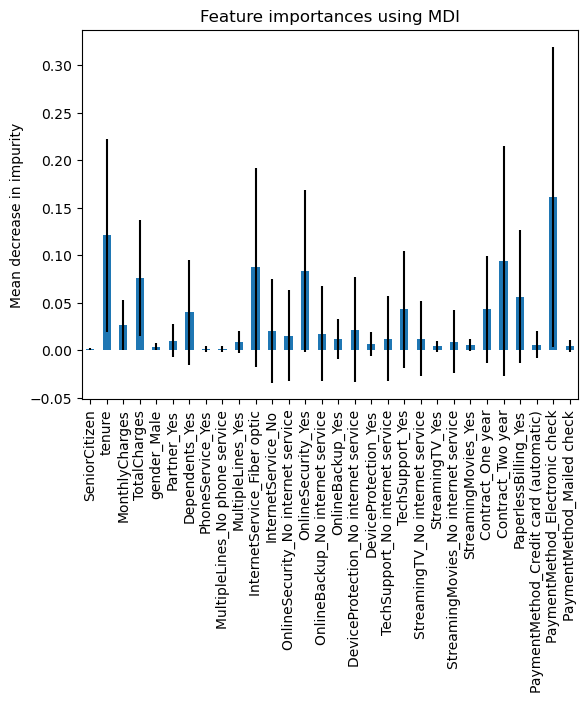

In [156]:
feature_names = X_trainForest3.columns

importances = forest4.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest4.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()